# Solve Brusselator kinetic

Let's create a simple kinetic.

## Create model

First we import the Kinetic Solver Interface:

In [1]:
import numpy as np
from scifit.interfaces.kinetics import KineticSolverInterface
from IPython.display import display, Math

And we configure it in order to represent the following dynamic system:
$$
\begin{eqnarray}
1A &  \overset{\beta_{0}}{\rightarrow}  & 1E \\
2E + 1F &  \overset{\beta_{1}}{\rightarrow}  & 3E \\
1B + 1E &  \overset{\beta_{2}}{\rightarrow}  & 1C + 1F \\
1E &  \overset{\beta_{3}}{\rightarrow}  & 1D
\end{eqnarray}
$$

In [2]:
kinetic = KineticSolverInterface(
    nur=np.array(
        [
            [-1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, -2, -1],
            [0, -1, 0, 0, -1, 0],
            [0, 0, 0, 0, -1, 0],
        ]
    ),
    nup=np.array(
        [
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 3, 0],
            [0, 0, 1, 0, 0, 1],
            [0, 0, 0, 1, 0, 0],
        ]
    ),
    k0=np.array([1.0, 1.0, 1.0, 1.0]),
    x0=np.array([1.0, 3.0, 0.0, 0.0, 1.0, 1.0]),
    unsteady=np.array([0.0, 0.0, 1.0, 1.0, 1.0, 1.0])
)

We can confirm we have encoded the right system:

In [3]:
display(Math(kinetic.model_equations()))

<IPython.core.display.Math object>

## Solve system

We create the time domain we want the system to be solved on:

In [4]:
t = np.linspace(0., 50., 5001)

Then we simply fit:

In [5]:
solution = kinetic.integrate(t)

C:\ProgramData\Anaconda3\envs\scifit\lib\site-packages\scipy\integrate\_quadrature.py:472: RuntimeWarning: invalid value encountered in multiply
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)


Returned solution is satisfying:

In [6]:
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  4.999e+01  5.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
            [ 3.000e+00  3.000e+00 ...  3.000e+00  3.000e+00]
            ...
            [ 1.000e+00  9.803e-01 ...  3.321e+00  3.294e+00]
            [ 1.000e+00  1.020e+00 ...  8.687e-01  8.727e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FD56CCF370>
 t_events: None
 y_events: None
     nfev: 4247
     njev: 0
      nlu: 0

## Rendering solution

We can assess rates and concentrations:

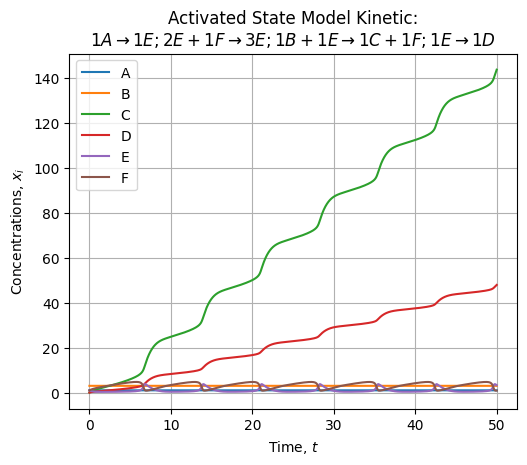

In [7]:
axe = kinetic.plot_solve()

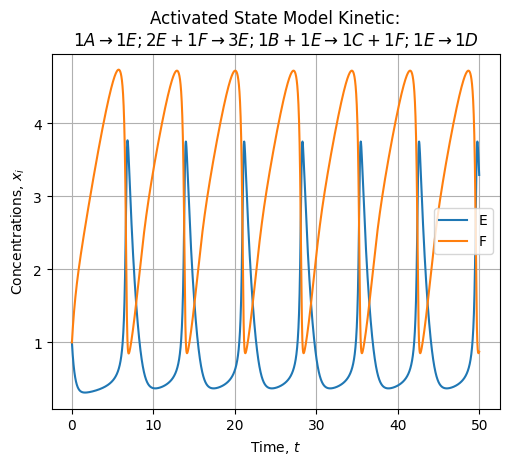

In [8]:
axe = kinetic.plot_solve(substance_indices=[4, 5])

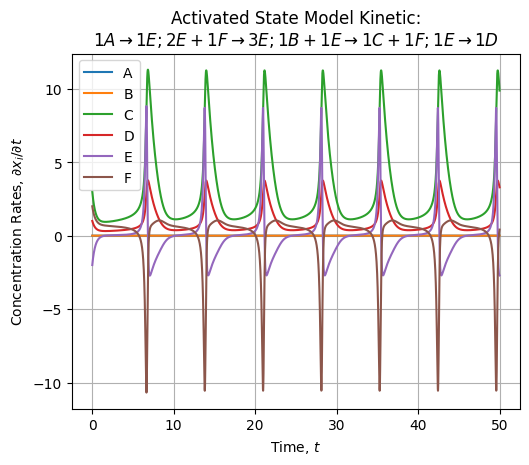

In [9]:
axe = kinetic.plot_rates()

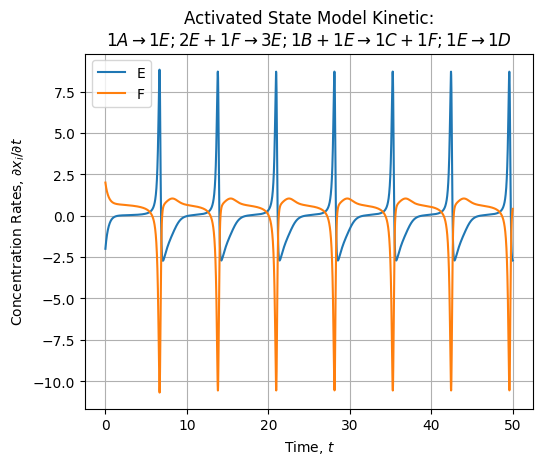

In [10]:
axe = kinetic.plot_rates(substance_indices=[4, 5])

Reaction quotients:

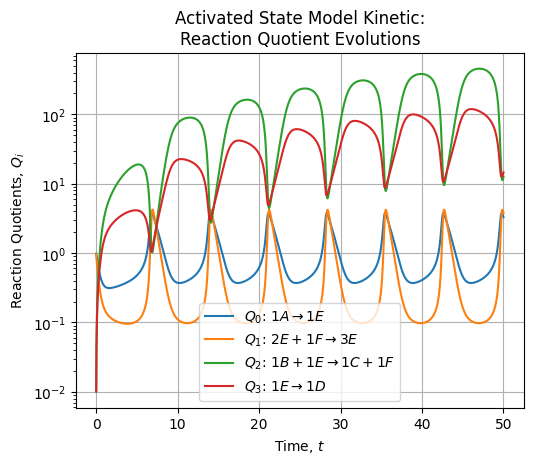

In [11]:
axe = kinetic.plot_quotients()